In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss


In [16]:
# Load the CSV file
df = pd.read_csv("heart_disease.csv")  # Make sure the CSV is in the same folder

# Display first 5 rows
df.head()


,Age,BloodPressure,Cholesterol,Disease
0,25,120,180,0
1,30,130,190,0
2,35,140,210,0
3,40,135,200,0
4,45,150,230,1


In [17]:
# Select features and target
X = df[['Age', 'BloodPressure', 'Cholesterol']]
y = df['Disease']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# Initialize MLPClassifier
model = MLPClassifier(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
    max_iter=300,  # Train until convergence
    random_state=42
)

# Train the model
model.fit(X_train, y_train)


C:\SIDDHIML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, random_state=42)

In [19]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Log loss
y_pred_prob = model.predict_proba(X_test)
loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss:.4f}")


Test Accuracy: 1.0000
Log Loss: 0.0499


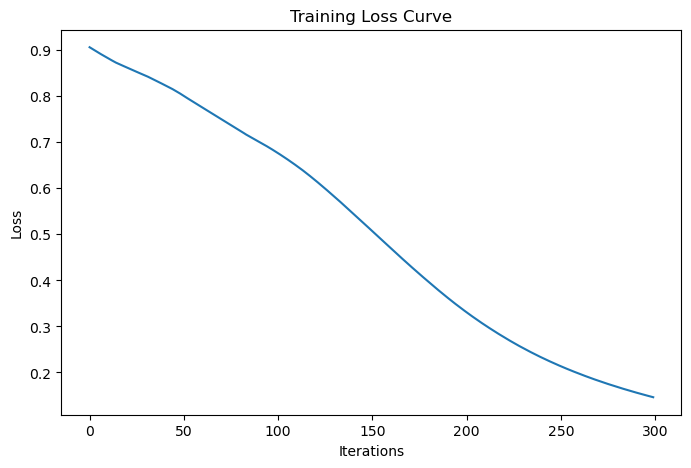

In [20]:
# Plot the training loss curve
plt.figure(figsize=(8,5))
plt.plot(model.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


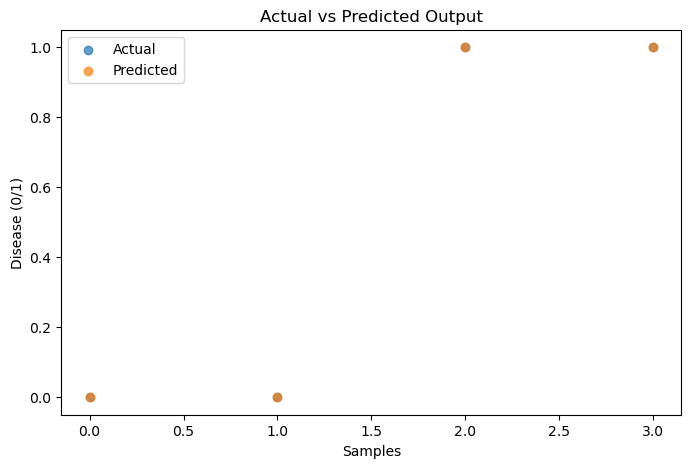

In [21]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7)
plt.xlabel("Samples")
plt.ylabel("Disease (0/1)")
plt.title("Actual vs Predicted Output")
plt.legend()
plt.show()
